In [4]:
!pip -q install gymnasium[classic_control] stable-baselines3 matplotlib numpy control

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.5/184.5 kB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 549.6/549.6 kB 26.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 102.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 86.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 43.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 85.5 MB/s eta 0:00:00


In [8]:
import gymnasium as gym
import numpy as np
import matplotlib.pyplot as plt
import control

In [10]:
# Preparing the environment
env = gym.make("Pendulum-v1", g=10)

In [14]:
## PID Control
Kp, Ki, Kd = 2.0, 0.4, 0.8
observation, _ = env.reset(seed=0)

angles, pid_traj = [], []
I = 0.0 # Sekibun kou
prev_e = 0.0
dt = env.unwrapped.dt

In [15]:
for _ in range(200):
  th = np.arctan2(observation[1], observation[0])
  e = 0.0 - th
  I += e*dt
  D = (e - prev_e) / dt
  prev_e = e

  u = Kp*e + Ki*I + Kd*D #  Torque Shirei
  observation, _, _, _, _ = env.step([u])

  angles.append(th)
  pid_traj.append(u)

In [16]:
## Short Time SAC
from stable_baselines3 import SAC

In [17]:
model = SAC('MlpPolicy', env, device="cpu", verbose=0).learn(2_000) # 2000 steps
observation, _ = env.reset(seed=1)
angles_rl = []

for _ in range(200):
  action, _ = model.predict(observation, deterministic = True)
  observation, _, _, _, _ = env.step(action)
  th = np.arctan2(observation[1], observation[0])
  angles_rl.append(th)

saved compare.png


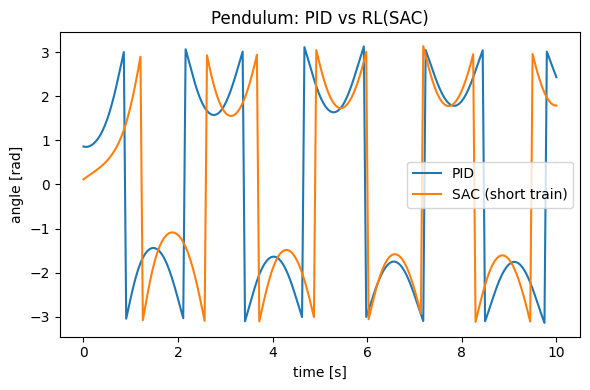

In [18]:
## Plot
t = np.linspace(0, len(angles) * dt, len(angles))

plt.figure(figsize = (6, 4))
plt.plot(t, angles, label="PID")
plt.plot(t, angles_rl, label="SAC (short train)")
plt.xlabel("time [s]")
plt.ylabel("angle [rad]")
plt.legend()
plt.title("Pendulum: PID vs RL(SAC)")
plt.tight_layout()
plt.savefig("compare.png", dpi=150)
print("saved compare.png")